In [18]:
import pandas as pd
import seaborn as sn
from pandas.plotting import scatter_matrix, lag_plot
import matplotlib.pyplot as plt
import numpy as np
import warnings
from Codigo import *
sn.set(style="whitegrid")

In [19]:
Datos = Tachos('../../China_Reducida.csv')
dt = Datos[['PIB (US$ a precios constantes de 2010)','Gasto de consumo final de los hogares (US$ a precios constantes de 2010)','Gasto nacional bruto (US$ a precios constantes de 2010)']].dropna(axis = 0)
dt.columns = ['PIB','Inversión','Gasto']
# Primero le sacaremos el logaritmo a cada una y usaremos la diferencial de estas.
dt_diff = pd.DataFrame()
for columna in dt.columns:
    dt_diff[columna] = np.log(dt[columna])
    dt_diff[columna] = dt_diff[columna].diff()
dt_diff.dropna(axis = 0, inplace= True)
dt_diff.head()

,PIB,Inversión,Gasto
fecha,,,
1996-12-30,0.094606,0.109545,0.116962
1997-12-31,0.088348,0.057736,0.064955
1998-12-31,0.075534,0.065468,0.091074
1999-12-31,0.073823,0.089271,0.102544
2000-12-30,0.081489,0.109664,0.101049


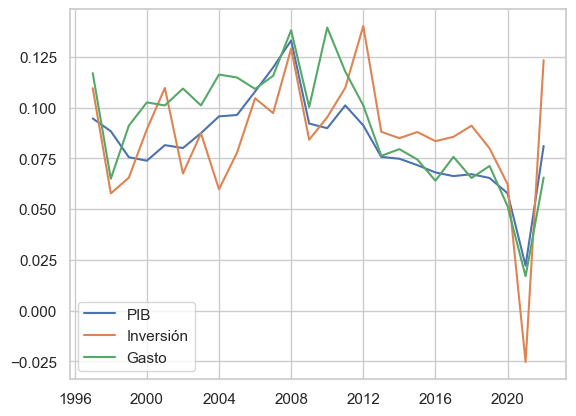

In [20]:
plt.plot(dt_diff, label = dt.columns)
plt.legend()
plt.show()

In [21]:
model = VAR(dt_diff)
orden = model.select_order(maxlags=5)
optimal = orden.selected_orders
print("Orden de lag")
for i in optimal:
    print(f'{i}: {optimal[i]}')

resultado = model.fit(5)
print(GrangeTest(dt_diff,resultado))


Orden de lag
aic: 5
bic: 1
hqic: 5
fpe: 4
    Endogena           Exogenas   p_value
0        PIB          Inversión  0.473679
1        PIB              Gasto  0.848328
2        PIB  [Inversión,Gasto]  0.558514
3  Inversión                PIB  0.761257
4  Inversión              Gasto  0.906993
5  Inversión        [PIB,Gasto]  0.671090
6      Gasto                PIB  0.944535
7      Gasto          Inversión  0.906072
8      Gasto    [PIB,Inversión]  0.833064


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
resultado.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 07, Dec, 2023
Time:                     13:47:45
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -22.7693
Nobs:                     21.0000    HQIC:                  -24.6386
Log likelihood:           222.753    FPE:                4.97642e-11
AIC:                     -25.1567    Det(Omega_mle):     9.09850e-12
--------------------------------------------------------------------
Results for equation PIB
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.092575         0.071177            1.301           0.193
L1.PIB               0.082253         1.382496            0.059           0.953
L1.Inversión        -0.243440         0.483392           -0.504   

### Analisis del mejor lag
- En todos el mejor es 0 pero revisando cada uno los valores que muestran son bastante buenos con el Akaike menor a 0 por lo que usaremos 2 lags para el analisis

In [29]:
endogena = dt_diff[['PIB','Inversión']]
model = VAR(endog = endogena, exog =dt_diff['Gasto'])
orden = model.select_order(maxlags=5)
optimal = orden.selected_orders
print("Orden de lag")
for i in optimal:
    print(f'{i}: {optimal[i]}')

Orden de lag
aic: 1
bic: 0
hqic: 1
fpe: 1


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
resultados = VAR(endog = endogena, exog =dt_diff['Gasto']).fit(1)
resultados.summary()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 07, Dec, 2023
Time:                     13:50:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.9833
Nobs:                     25.0000    HQIC:                  -16.2651
Log likelihood:           141.719    FPE:                7.79063e-08
AIC:                     -16.3733    Det(Omega_mle):     5.78971e-08
--------------------------------------------------------------------
Results for equation PIB
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.018098         0.009470            1.911           0.056
Gasto                0.479890         0.113700            4.221           0.000
L1.PIB               0.420342         0.204124            2.059   

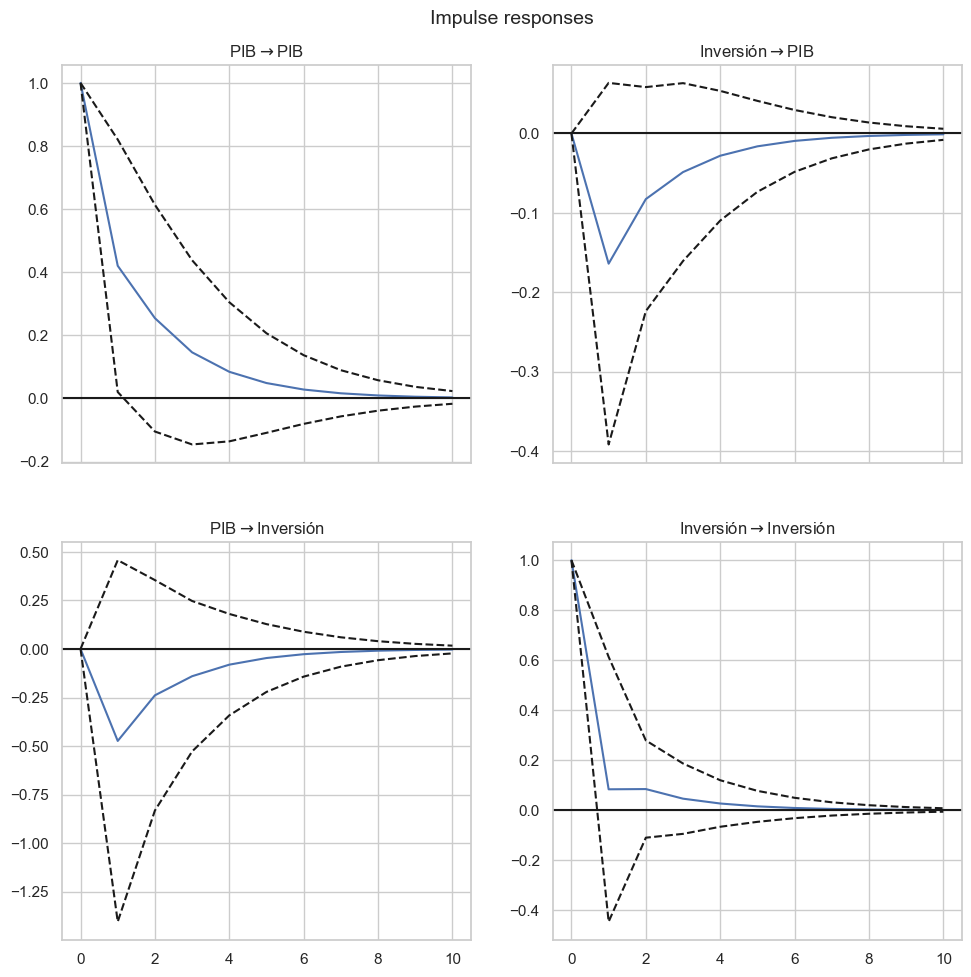

In [31]:
irf = resultados.irf()
irf.plot()
plt.show()

In [33]:
forecast = prediccionVAR(resultados, endogena,steps=12)
for i in dt_diff.columns:
    plt.plot(dt_diff[i])
    plt.plot(forecast[i], linestyle = "--")
    plt.title(i)
    plt.show()

ValueError: Please provide an exog_future argument to the forecast method.

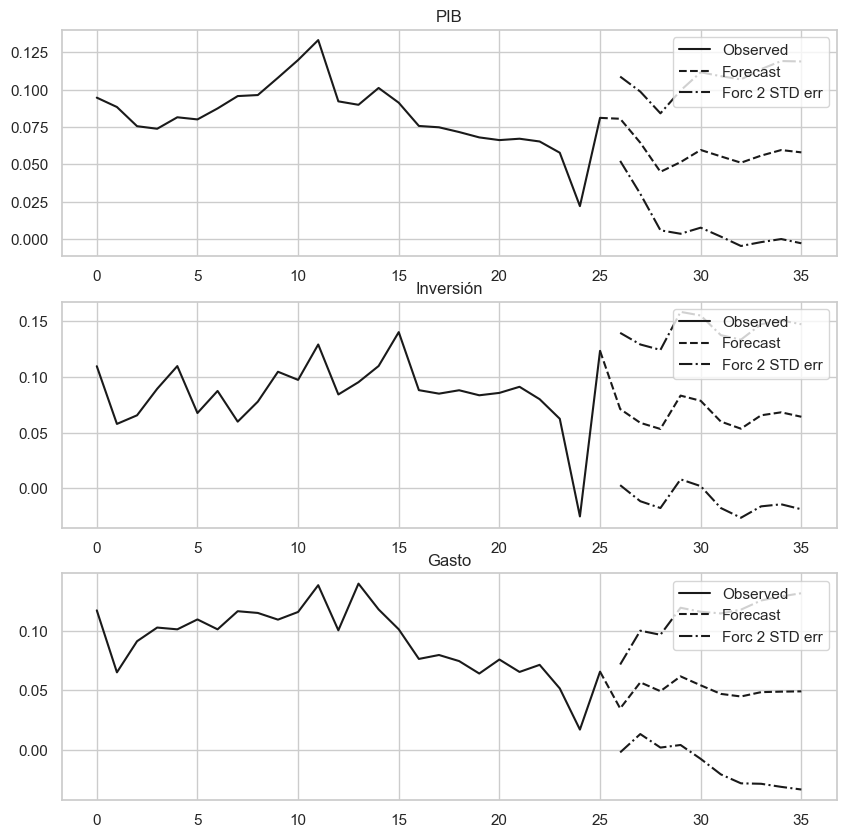

In [ ]:
fig = resultados.plot_forecast(10)
plt.show()